In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn import cross_validation, preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [53]:
def data_frame(string):
    df = pd.read_csv(string,names=[i for i in range(1,25)])
    lis = [i for i in range(len(df)+1)]
    df[0] =  pd.DataFrame({'col':lis})
    df.set_index(0)
    # print(df[2][4])
    #(df.head())
    l = []
    for i in range(len(df)):
        for x in range(1,25):
            l.append(df[x][i])
    df_new = pd.DataFrame()
    df_new['d_train'] = pd.DataFrame({'d_train':l})
    #print(df_new['d_train'].head())
    return df_new['d_train']

In [54]:
def previous_low(string):
    df = pd.read_csv(string,names=[i for i in range(24)])
    l = []
    #print(df)
    low = df.iloc[0,:].min()
    for j in range(24):
        l.append(low)
    for i in range(0,899):
        low = df.iloc[i,:].min()
        for j in range(24):
            l.append(low)
    
    df_new = pd.DataFrame({'previous_low':l})
    return df_new
def previous_high(string):
    df = pd.read_csv(string,names=[i for i in range(24)])
    l = []
    #print(df)
    low = df.iloc[0,:].max()
    for j in range(24):
        l.append(low)
    for i in range(0,899):
        low = df.iloc[i,:].max()
        for j in range(24):
            l.append(low)
    
    df_new = pd.DataFrame({'previous_high':l})
    return df_new
    
def previous_avg(string):
    df = pd.read_csv(string,names=[i for i in range(24)])
    l = []
    #print(df)
    low = df.iloc[0,:].mean()
    for j in range(24):
        l.append(low)
    for i in range(0,899):
        low = df.iloc[i,:].mean()
        for j in range(24):
            l.append(low)
    
    df_new = pd.DataFrame({'previous_avg':l})
    return df_new

def today_low(string):
    df = pd.read_csv(string,names=[i for i in range(24)])
    l = []
    #print(df)
    for i in range(900):
        low = df.iloc[i,:].min()
        for j in range(24):
            l.append(low)
    df_new = pd.DataFrame({'today_low':l})
    return df_new
    
    
def today_high(string):
    df = pd.read_csv(string,names=[i for i in range(24)])
    l = []
    #print(df)
    for i in range(900):
        low = df.iloc[i,:].max()
        for j in range(24):
            l.append(low)
    df_new = pd.DataFrame({'today_high':l})
    return df_new
    
def today_avg(string):
    df = pd.read_csv(string,names=[i for i in range(24)])
    l = []
    #print(df)
    for i in range(900):
        low = df.iloc[i,:].mean()
        for j in range(24):
            l.append(low)
    df_new = pd.DataFrame({'today_avg':l})
    return df_new

def getAll(string):
    l = []
    l.append(today_low(string))
    l.append(today_high(string))
    l.append(today_avg(string))
    return l
    
    

In [55]:
df_x = pd.DataFrame()
df_y = pd.DataFrame()

df_y['d_train'] = data_frame('Demand_Train.csv')
df_x['d_pred'] = data_frame('Demand_Train_pred.csv')
#df_x['today_low'],df_x['today_high'],df_x['today_avg'] = getAll('Demand_Train_pred.csv')

df_y['p_train'] = data_frame('Price_Train.csv')
df_x['p_pred'] = data_frame('Price_Train_pred.csv')

df_y['s_train'] = data_frame('Solar_Train.csv')
df_x['s_pred'] = data_frame('Solar_Train_pred.csv')





In [56]:
df_x.fillna('bfill',inplace=True)
df_y.fillna('bfill',inplace=True)

In [57]:
#print(df_x.tail(),df_y.tail())

In [58]:
# print(df_x.head())
# # fig = plt.figure()
# # ax1 = plt.subplot2grid((1,1),(0,0))
# # ax2 = plt.subplot2grid((1,1),(1,1))
# x = (df_x['d_train']-df_x['s_train']) - (df_y['d_pred']-df_y['s_pred'])
# x.plot()
# # df_new['d_train'].plot(ax = ax2,label='Time')

# plt.legend()
# plt.show()

In [59]:
X = np.array(df_x).astype('float')
X = preprocessing.scale(X)
y = np.array(df_y).astype('float')
# from sklearn.utils import resample
# X, y = resample(X, y, random_state=0)
# print(X[:5],y[:5])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.0)
clf_d = LinearRegression()
# clf = RandomForestClassifier()
# clf_d = svm.SVR(kernel = 'linear') 
clf_d.fit(X_train,y_train)
#clf_d.score(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
df_test = pd.DataFrame()
df_test['d'] = data_frame('Demand_LB_pred.csv')
df_test['p'] = data_frame('Price_LB_pred.csv')
df_test['s'] = data_frame('Solar_LB_pred.csv')
#df_test['today_low'],df_test['today_high'],df_test['today_avg'] = getAll('Demand_Train_pred.csv')

In [61]:
df_out = pd.DataFrame()
df_out = clf_d.predict(preprocessing.scale(df_test))
# t_out = pd.DataFrame()
# t_out = clf_d.predict(X_test)

In [62]:
print(df_out[:5])
print(df_test[:5])
za = pd.DataFrame(df_out-df_test)
# ya = pd.DataFrame(y_test-t_out)
# print(ya.mean())
za.sum()/1200

[[ 28.88609231   2.08507094   0.47395216]
 [ 27.33008238   1.79503139   0.4595737 ]
 [ 22.68692018   1.81234964   0.46089636]
 [ 70.27663024   1.65819026   0.44850929]
 [ 15.48158789   1.87562176   0.46477239]]
       d     p    s
0  31.20  2.10  0.0
1  29.86  1.79  0.0
2  25.67  1.81  0.0
3  68.61  1.63  0.0
4  19.16  1.88  0.0


d    2.565822
p   -0.032159
s    1.558700
dtype: float64

In [63]:
df_p = pd.DataFrame(df_out)
print(df_test.head())
print(df_p.head())

       d     p    s
0  31.20  2.10  0.0
1  29.86  1.79  0.0
2  25.67  1.81  0.0
3  68.61  1.63  0.0
4  19.16  1.88  0.0
           0         1         2
0  28.886092  2.085071  0.473952
1  27.330082  1.795031  0.459574
2  22.686920  1.812350  0.460896
3  70.276630  1.658190  0.448509
4  15.481588  1.875622  0.464772


In [64]:
df_p.describe()

,0,1,2
count,1200.000000,1200.000000,1200.000000
mean,76.399647,2.906941,6.863150
std,56.670958,1.160471,8.771817
min,10.453419,0.520872,0.396839
25%,25.823327,2.029991,0.472142
50%,64.340709,2.772087,0.540571
75%,110.256019,3.596573,13.443528
max,321.736846,7.997144,30.879021


In [65]:
d = pd.DataFrame()
d[0] = df_p[0] - df_p[2]
d[0] = d[0] 
d[1] = df_p[1] + 0.45  #.45


In [66]:
# for i in range(50):
#     z = 0.
#     for j in range(24):
#         need = df_p[0][i*24+j]- df_p[2][i*24+j] 
#         need += da[i*24+j]
# #     for j in range(24):
# #         need = df_p[0][i*24+j]- df_p[2][i*24+j] 
# #         z = z + need * df_p[1][i*24+j]
# #     z = z/24.
# #     for j in range(24):
# #         need = df_p[0][i*24+j]- df_p[2][i*24+j]
# #         if need * df_p[1][i*24+j] > z:
# #             need = need - 4
# #         else:
# #             need = need + 5
#         d[0][i*24+j] = need

In [67]:
d[0] = d[0]
p = pd.DataFrame()
p[0] = d[1]
p[1] = d[0]
p.reset_index()
p.to_csv('9.csv',index=False,header=None)

In [68]:
data = [i for i in range(900*24)]
label = []

In [69]:
p.head()

,0,1
0,2.535071,28.412140
1,2.245031,26.870509
2,2.262350,22.226024
3,2.108190,69.828121
4,2.325622,15.016815


In [70]:
import numpy as np
dp = np.zeros(shape=[2222,55], dtype=np.float)
# pri = np.zeros(shape=[2222,55], dype=np.float)
prb = np.zeros(shape=[2222,55], dtype=np.float)
r = np.zeros(shape=[2222,], dtype=np.float)
p = np.zeros(shape=[2222,], dtype=np.float)
flag = np.zeros(shape=[2222,55], dtype=np.float)


In [71]:
r = np.array(d[0])
p = np.array(d[1])

In [72]:
# print(len(r))

In [73]:
def solv2e(curr, b):
#     if curr >= 1000:
#         print(curr)
#         return 0
# #     return 0
    global dp
    global r
    global p
    global flag
    global prb
#     print(type(flag))
#     pass
    if curr >= 1200:
#         print(curr, b)
        return 0
    if r[curr] <= 0:
        flag[curr, b] = 1
        dp[curr, b] = 1e9
        for i in range(5):
            if i + b > 25:
                continue
            cost = i*1.25*p[curr]
            x = solv2e(curr+1,b+i)
            if cost + x < dp[curr,b]:
                dp[curr,b] = cost + x
                prb[curr,b] = i
        return dp[curr, b]
    if flag[curr,b] > 0:
        return dp[curr,b]
    flag[curr,b] = 1
    dp[curr,b] = 1e9
    for i in range(int(min(5,min(b,r[curr]))+1)):
        cost = (r[curr] - i)*p[curr]
        x = solv2e(curr+1, b-i)
        if cost + x < dp[curr,b]:
            dp[curr,b] = cost + x
            prb[curr,b] = -i
#         dp[curr,b] = min(dp[curr,b], cost + solve(curr+1, b-i))
    for j in range(4):
        i = j+1
        if i + b > 25:
            continue
        cost = (r[curr] + i*1.25)*p[curr]
        x = solv2e(curr+1, b+i)
        if cost + x < dp[curr, b]:
            dp[curr,b] = cost + x
            prb[curr, b] = i
#         dp[curr,b] = min(dp[curr,b], cost + solve(curr+1, b+i))
    return dp[curr,b]

In [74]:
import sys
sys.setrecursionlimit(2000)
ans = solv2e(0,0)
print(ans)

299618.245472


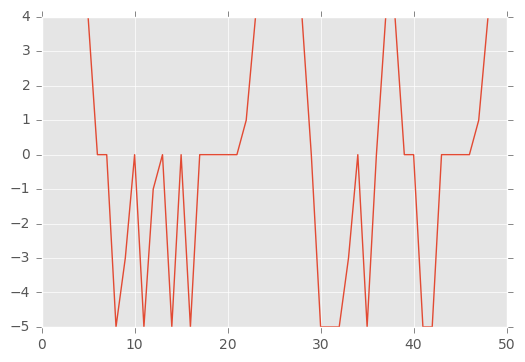

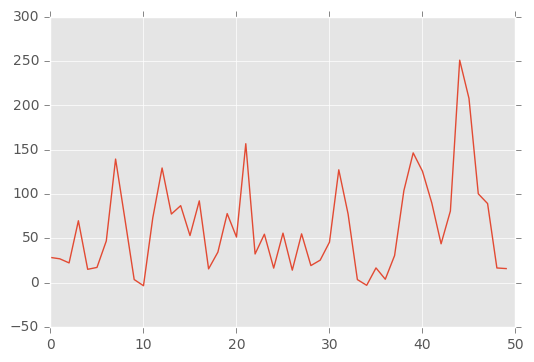

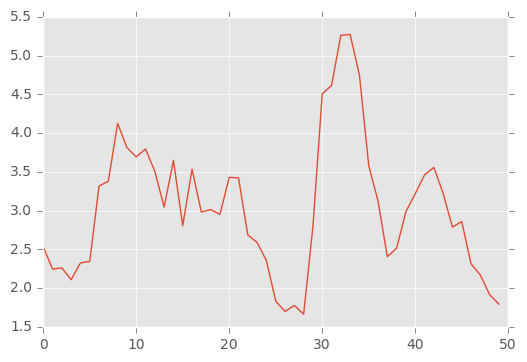

In [75]:
da = []
bat = 0
for i in range(1200):
    da.append(prb[i,bat])
    bat += int(prb[i,bat])
plt.plot(np.array(da[:50]))
plt.show()
plt.plot(d[0][:50])
plt.show()
plt.plot(d[1][:50])
plt.show()

In [76]:
z = 0
for i in range(1200):
    z += r[i]*p[i]
print(z)

302099.896658


In [77]:
for i in range(50):
    z = 0.
    for j in range(24):
        need = df_p[0][i*24+j]- df_p[2][i*24+j] 
        need += da[i*24+j]
#     for j in range(24):
#         need = df_p[0][i*24+j]- df_p[2][i*24+j] 
#         z = z + need * df_p[1][i*24+j]
#     z = z/24.
#     for j in range(24):
#         need = df_p[0][i*24+j]- df_p[2][i*24+j]
#         if need * df_p[1][i*24+j] > z:
#             need = need - 4
#         else:
#             need = need + 5
        d[0][i*24+j] = need

In [78]:
p = pd.DataFrame()
p[0] = d[1]
p[1] = d[0]  +1 #+1 #-1 
p[0].loc[p[0]>=7]=7
p.reset_index()
p.to_csv('9.csv',index=False,header=None)

In [79]:
# p.describe()